In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from model import *

c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


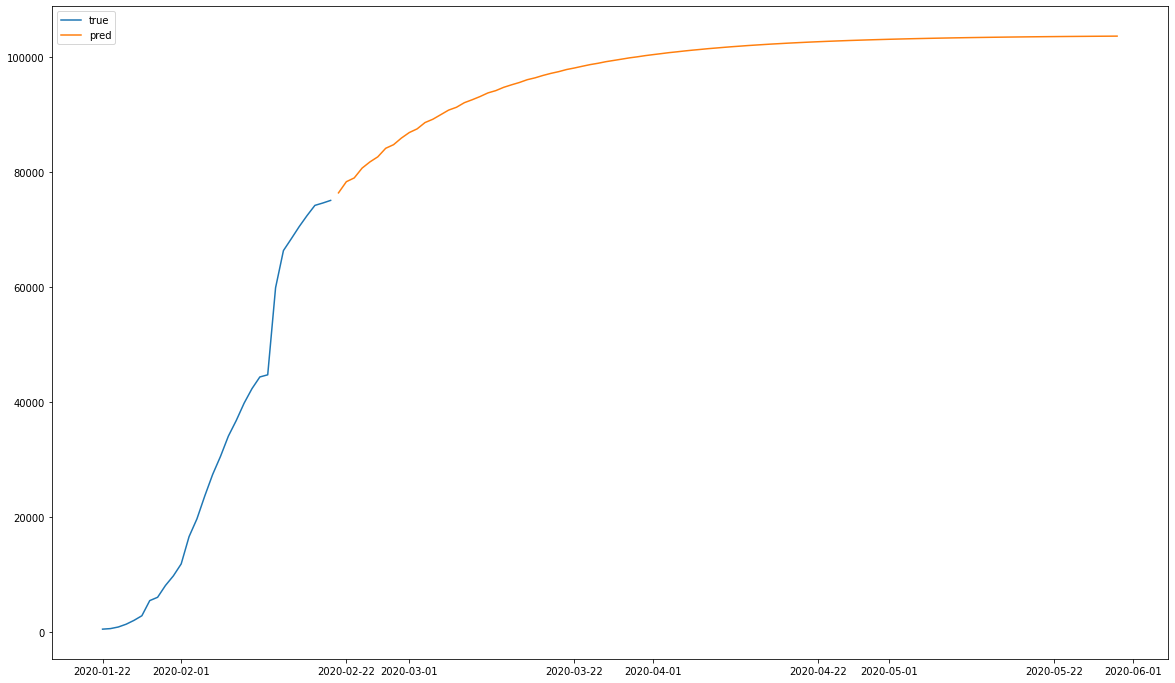

In [16]:
data=pd.read_csv('./data/train.csv')
model = sm.tsa.ARIMA(data['people'], order=(3, 1, 3))
results = model.fit()
long=100
pred=results.forecast(long)
# time2=[i for i in range(len(data.index),long+len(data.index))]
time=pd.date_range(start='2020-01-22',end='2020-02-20',freq='D')
time2=pd.date_range(start='2020-02-21',end='2023-02-20',freq='D')[:long]
plt.figure(figsize=(20,12))
plt.plot(time,data['people'],label='true')
plt.plot(time2,pred,label='pred')
plt.legend()
plt.savefig('./img/ARIMA_China')
plt.show()

In [17]:
confirmed=pd.read_csv('./data/American.csv',encoding='gbk',index_col = 'date',parse_dates=['date'])[50:]

# confirmed['confirmed']=confirmed['confirmed'].diff(1).fillna(0)
confirmed['Close_diff_1'] = confirmed['confirmed'].diff(1)
confirmed['Close_diff_2'] = confirmed['Close_diff_1'].diff(1)


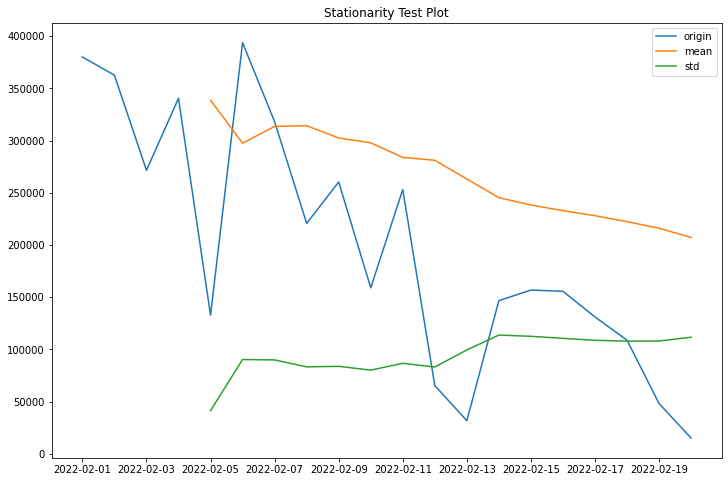

In [18]:
value=confirmed.loc['2022-02-01':'2022-02-20']
fig, ax = plt.subplots(figsize=(12, 8))
plt.plot(value.index,value['confirmed'],label='origin')

value_mean=[np.mean(value['confirmed'][:i]) for i in range(4,len(value['confirmed']))]
plt.plot(value[4:].index,value_mean,label='mean')

value_std=[np.std(value['confirmed'][:i]) for i in range(4,len(value['confirmed']))]
plt.plot(value[4:].index,value_std,label='std')

plt.legend()
plt.title('Stationarity Test Plot')
plt.savefig('./img/Q3/mean_std')
# plt.plot(value[5:],)
# plt.show()
# value

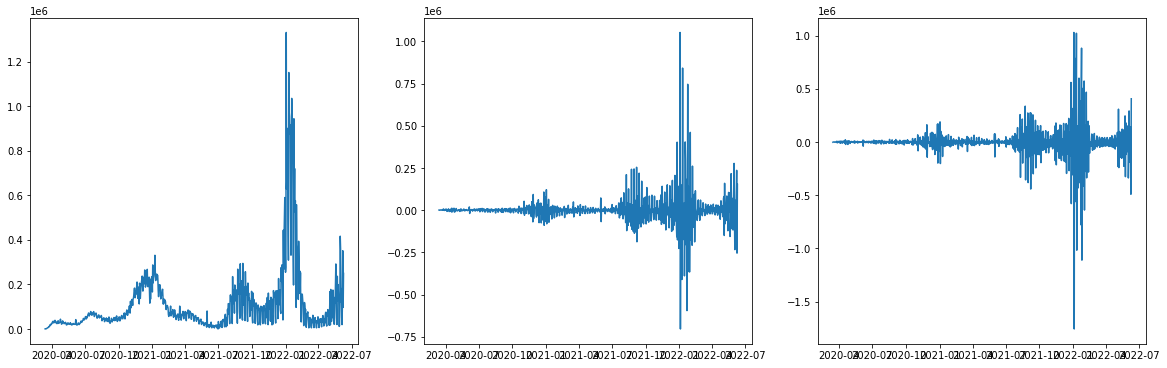

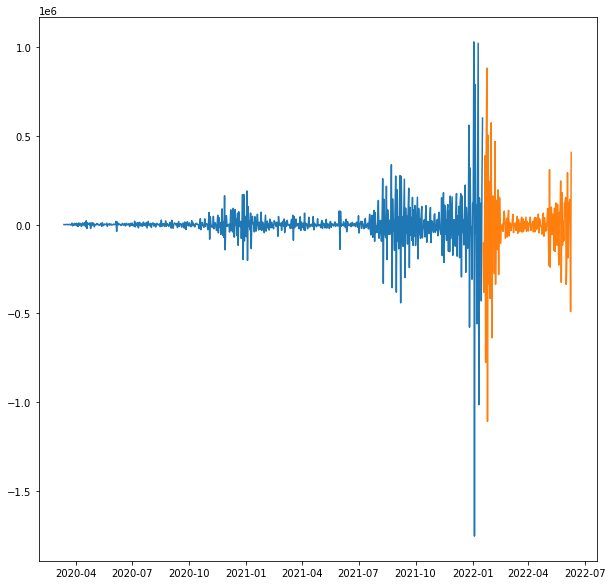

In [19]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(131)
ax1.plot(confirmed['confirmed'])
ax2 = fig.add_subplot(132)
ax2.plot(confirmed['Close_diff_1'])
ax3 = fig.add_subplot(133)
ax3.plot(confirmed['Close_diff_2'])
plt.savefig('./img/Q3/diff')
plt.show()


# print(confirmed)
#ChinaBank.index = pd.to_datetime(ChinaBank.index)
fiag=round(0.825*confirmed['Close_diff_2'].size)
train = confirmed.iloc[:fiag]['Close_diff_2'].fillna(0)
test =  confirmed.iloc[fiag:]['Close_diff_2'].fillna(0.825)
plt.figure(figsize=(10,10))
plt.plot(train)
plt.plot(test)
plt.savefig('img/Q3/train_test')
plt.show()


date
2020-03-13         0.0
2020-03-14         0.0
2020-03-15     -1433.0
2020-03-16       622.0
2020-03-17       904.0
                ...   
2022-01-13    -55549.0
2022-01-14    119852.0
2022-01-15   -430517.0
2022-01-16    192846.0
2022-01-17    600711.0
Name: Close_diff_2, Length: 676, dtype: float64


c:\miniconda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


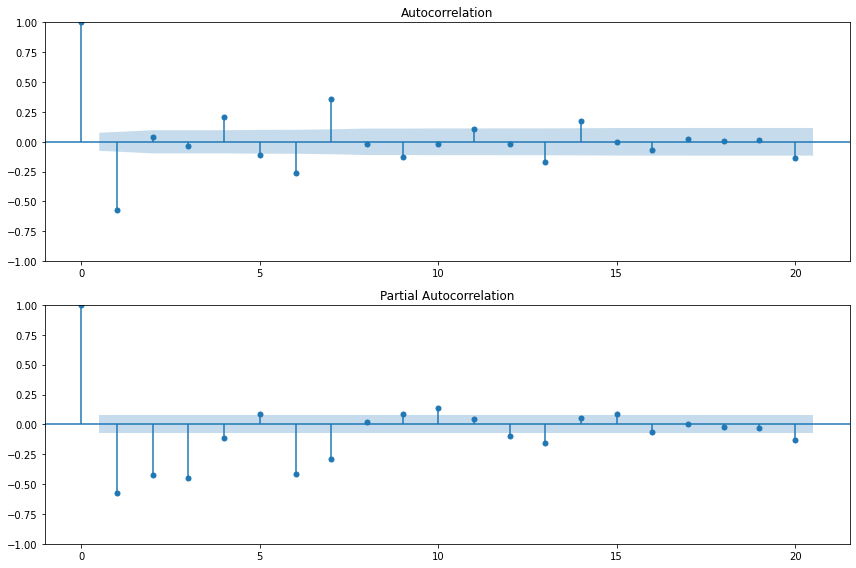

In [20]:
fig = plt.figure(figsize=(12,8))
print(train)
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train, lags=20,ax=ax1)
ax1.xaxis.set_ticks_position('bottom')
fig.tight_layout()
 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train, lags=20, ax=ax2)
ax2.xaxis.set_ticks_position('bottom')
fig.tight_layout()
plt.savefig('./img/Q3/AT_PA')
plt.show()

c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmo

c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: Value

c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA par

c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


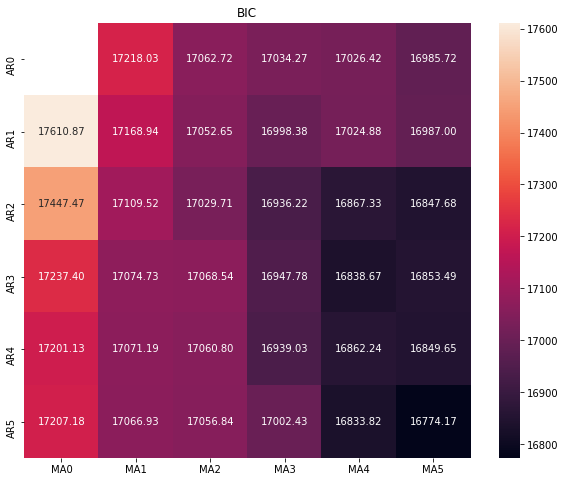

over


In [21]:
#遍历，寻找适宜的参数
import itertools
import numpy as np
import seaborn as sns
 
p_min = 0
d_min = 0
q_min = 0
p_max = 5
d_max = 0
q_max = 5
 
# Initialize a DataFrame to store the results,，以BIC准则
results_bic = pd.DataFrame(index=['AR{}'.format(i) for i in range(p_min,p_max+1)],
                           columns=['MA{}'.format(i) for i in range(q_min,q_max+1)])
 
for p,d,q in itertools.product(range(p_min,p_max+1),
                               range(d_min,d_max+1),
                               range(q_min,q_max+1)):
    if p==0 and d==0 and q==0:
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = np.nan
        continue
 
    try:
        model = sm.tsa.ARIMA(train, order=(p, d, q),
                               #enforce_stationarity=False,
                               #enforce_invertibility=False,
                              )
        results = model.fit()
        results_bic.loc['AR{}'.format(p), 'MA{}'.format(q)] = results.bic
    except:
        continue
results_bic = results_bic[results_bic.columns].astype(float)
 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(results_bic,
                 mask=results_bic.isnull(),
                 ax=ax,
                 annot=True,
                 fmt='.2f',
                 )
ax.set_title('BIC')
plt.savefig('./img/Q3/matric')
plt.show()
print('over')

In [22]:
train_results = sm.tsa.arma_order_select_ic(train, ic=['aic', 'bic'], trend='n', max_ar=8, max_ma=8)
 
print('AIC', train_results.aic_min_order)
print('BIC', train_results.bic_min_order)
#China: 
#   AIC (6, 4)
#   BIC (3, 3)
#American: 
#   AIC (7, 8)
#   BIC (7, 8)
# 一般来说，BIC准则得到的ARMA模型的阶数较AIC的低。

c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\miniconda\lib\site-packages\sta

c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


AIC (7, 8)
BIC (7, 8)


c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA par

<Figure size 864x576 with 0 Axes>

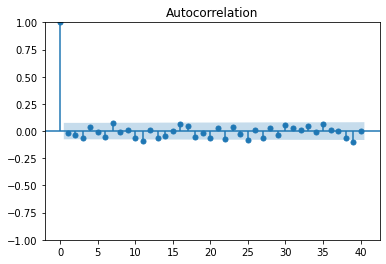

date
2020-03-13         0.0
2020-03-14         0.0
2020-03-15     -1433.0
2020-03-16       622.0
2020-03-17       904.0
                ...   
2022-01-13    -55549.0
2022-01-14    119852.0
2022-01-15   -430517.0
2022-01-16    192846.0
2022-01-17    600711.0
Name: Close_diff_2, Length: 676, dtype: float64


In [23]:
model = sm.tsa.ARIMA(train, order=(7, 1, 8))
results = model.fit()
resid = results.resid #赋值
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.tsa.plot_acf(resid.values.squeeze(), lags=40)
plt.savefig('./img/Q3/eval')
plt.show()
print(train)

In [24]:
model = sm.tsa.ARIMA(train, order=(7, 2, 8))
# model = sm.tsa.ARIMA(confirmed['confirmed'], order=(7, 1, 8))
results = model.fit()
print(results.summary())

c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\miniconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA par

                               SARIMAX Results                                
Dep. Variable:           Close_diff_2   No. Observations:                  676
Model:                 ARIMA(7, 2, 8)   Log Likelihood               -8355.569
Date:                Mon, 27 Jun 2022   AIC                          16743.138
Time:                        09:08:17   BIC                          16815.350
Sample:                    03-13-2020   HQIC                         16771.101
                         - 01-17-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2607      0.082    -15.316      0.000      -1.422      -1.099
ar.L2         -1.2209      0.062    -19.587      0.000      -1.343      -1.099
ar.L3         -1.4049      0.087    -16.159      0.0

c:\miniconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


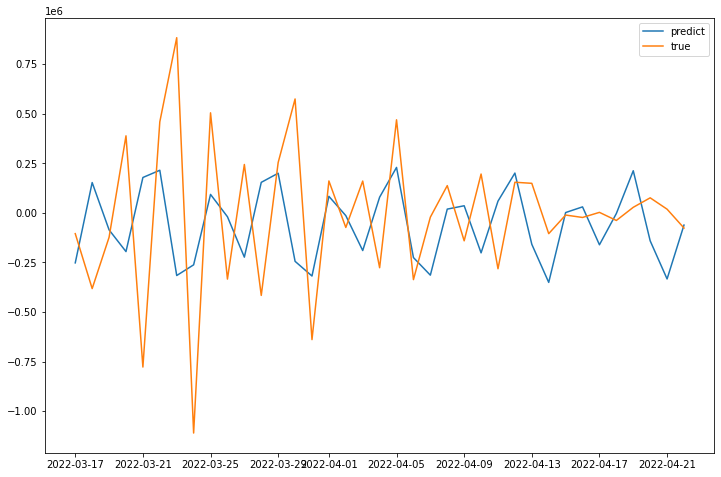

In [25]:
# confirmed['confirmed']
t1='2022-3-17'
t2='2022-4-22'
predict_sunspots = results.predict(start=t1,end=t2,dynamic=False)
fig, ax = plt.subplots(figsize=(12, 8))
# ax = confirmed.plot(ax=ax)

time1=pd.date_range(start=t1,end=t2,freq='D')
# time2=pd.date_range(start='2021-09-24',end='2022-06-04',freq='D')
time2=pd.date_range(start='2022-06-04',end='2021-09-24',freq='D')
ax.plot(time1,predict_sunspots,label='predict')
ax.plot(time1,test[:len(time1)],label='true')
# ax.plot(time2,confirmed['confirmed'].values,label='true')
# predict_sunspots.plot(ax=ax)
plt.legend()
plt.savefig('./img/Q3/ARIMA_predict')
plt.show()

In [26]:
# end_time=confirmed.index[-1]
# time=pd.date_range(start=end_time,end='2023-01-01',freq='D')
# plt.figure(figsize=(15,8))
# plt.plot(time,results.forecast(207),label='pred')
# plt.legend()
# plt.grid()
# plt.savefig('./img/Arima_us')
# plt.show()
def inv_diff(diff_df, first_value, add_first=True):
    diff_df.reset_index(drop=True, inplace=True)
#     print(diff_df)
    diff_df.index = diff_df.index + 1
#     print(diff_df)
    diff_df = pd.DataFrame(diff_df)
    diff_df = diff_df.cumsum()
    df = diff_df + first_value
    if add_first:
        df.loc[0] = first_value
        df.sort_index(inplace=True)
    return df

30 30 20
[   3800.8          56322.79310345   81185.06451613   85675.4
   87113.70967742   87870.83333333   89320.35483871   93310.35483871
   94945.5          96278.96774194   98155.6         101031.61290323
  105140.61290323  108499.          109597.          110755.43333333
  111775.90322581  112967.53333333  114364.25806452  117019.67741935
  118836.53333333  120458.61290323  122722.16666667  125418.
  131340.64516129  176512.35714286 1056815.93548387 1728506.56666667
 2075433.         2098210.75      ]


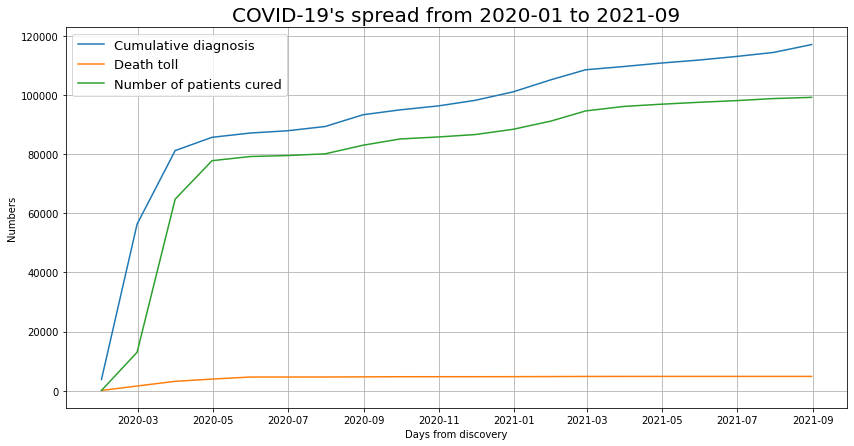

In [27]:
doc_path='./data'
confimed_path=doc_path+'/confimed.csv'
cure_path=doc_path+'/cure.csv'
died_path=doc_path+'/died.csv'

missing_values = ["n/a", "na", "--"]

confime=pd.read_csv(confimed_path)
died=pd.read_csv(died_path)
cure=pd.read_csv(cure_path)

def get_city_case(city,model,confime):
    #China France Germany,Korea, North
    confime_total=confime[confime['Country/Region']==city]
    # confime_total=confime
    if model=='confime'or model=='died':
        clip=-7
    elif model=='cure':
        clip=-311
    columns=confime_total.columns[4:clip].values
    loc=confime_total.loc[:,columns].sum()
    year_mouth=np.zeros((columns.size))
    day=np.zeros((columns.size))
    column=np.zeros((columns.size))

    for index,i in enumerate(columns):
        b=columns[index].split(r'/')
        if len(b[0])==1:
            year_mouth[index]='20'+b[2]+'0'+b[0]
        else:
             year_mouth[index]='20'+b[2]+b[0]
        day[index]=b[1]
    confime_sum=pd.DataFrame([loc.values,year_mouth,day],index=['People','Year_Mouth','Day'])
    confime_sum=pd.DataFrame(confime_sum.values.T,index=confime_sum.columns,columns=confime_sum.index)
    china_dict=confime_sum.groupby('Year_Mouth')
    y_value=china_dict.agg(np.mean)["People"].values
    return y_value,confime_sum

city='China'
confime_china,confime_sum=get_city_case(city,'confime',confime)
model='confime'# died ,cure
died_china,died_sum=get_city_case(city,'confime',died)
cure_chia,cure_sum=get_city_case(city,'cure',cure)
print(len(confime_china),len(died_china),len(cure_chia))

model=ARIMa(confirmed['新增死亡'])
fig, ax = plt.subplots(figsize=(14, 7))
time=pd.date_range(start='2020-1',end='2021-9',freq='M')
print(confime_china)
ax.plot(time, confime_china[:20], label='Cumulative diagnosis')
ax.plot(time, died_china[:20], label='Death toll')
ax.plot(time, cure_chia, label='Number of patients cured')
ax.set_xlabel('Days from discovery')
ax.set_ylabel('Numbers')
ax.legend(fontsize=13)
ax.set_title("COVID-19's spread from 2020-01 to 2021-09",fontsize=20)
ax.grid(True)
plt.savefig('./img/中国变化趋势')
plt.show()

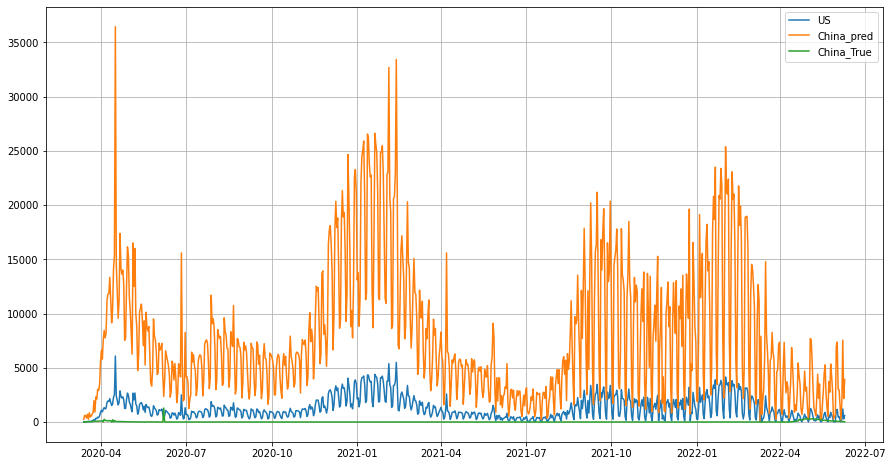

In [28]:
end_time=train.index[-1]
time=pd.date_range(start=end_time,end='2022-9-01',freq='D')
plt.figure(figsize=(15,8))

# plt.plot(time,result,label='pred')
# 新增治愈
# 新增死亡
plt.plot(confirmed['新增死亡'].index,confirmed['新增死亡'],label='US')

pred=[(i+random.randrange(-10,100))*6 for i in confirmed['新增死亡'] ]
pred= model.fit()
plt.plot(confirmed.index,pred,label='China_pred')
plt.plot(confirmed.index,died_sum['People'].diff(1).fillna(0)[:819],label='China_True')
# print(confime_china)
# plt.plot(confirmed.index,confirmed,label='true')
plt.legend()
plt.grid()
plt.savefig('./img/Arima_us_died')
plt.show()
# confime_sum['People'].diff(1).fillna(0)